# Basic plotting with Pandas

Pandas has some built-in methods for plotting, based in the background on Matplotlib, the very powerful grand-daddy of the Python visualization modules.

We'll start, like usual, by importing Pandas, but we'll also use an
[iPython magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
to tell Matplotlib to render inline in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('data/women_percent_deg_usa_subset.csv')
df.head()

,Year,Agriculture,Business,Engineering,Health,Psychology
0,1970,4.229798,9.064439,0.8,77.1,44.4
1,1971,5.452797,9.503187,1.0,75.5,46.2
2,1972,7.420710,10.558962,1.2,76.9,47.6
3,1973,9.653602,12.804602,1.6,77.4,50.4
4,1974,14.074623,16.204850,2.2,77.9,52.6


## Line plot

We often use `df.head()` and `.tail()` to see what our data table looks like, but **data visualization is a marvelous way to explore our data!**

Since this is a time-series, the natural starting place for visualization is a line plot. Pandas has a pretty simple syntax for its basic chart types.

You can either use the plot method directly, and tell it which "kind" of plot you want, 

`df.plot(kind='line')`

or you can follow the plot with a dot and the type of plot

`df.plot.line()`

### Pandas plots kind of like Excel!

Pandas is kind of like Excel for plotting, in that it wants the data in the sort of "wide" format our data is in right now, where our X-axis data is in one column, and we have series that will go on the Y-axis in separate columns. *We'll see in another module that packages like Seaborn and Altair want the data in "tidy" or "tall" format.*

**If you specify the x column, then Pandas will assume you want to use the rest for Y!**

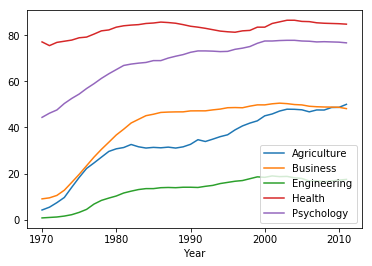

In [3]:
df.plot.line(x='Year')

#### Or, you can specify which columns to plot with `y=[,,]`

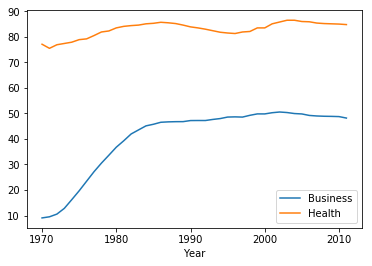

In [4]:
df.plot.line(x='Year', y=['Business','Health'])

### Index is default for X

If you don't specify anything for X, Pandas will assume you want to use the Index

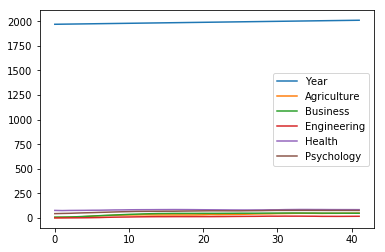

In [5]:
df.plot.line()

### Set Index from a column

We can set the Year column to be the Index with `df.set_index()`

In [6]:
df.set_index('Year', inplace=True)
df.head()

,Agriculture,Business,Engineering,Health,Psychology
Year,,,,,
1970,4.229798,9.064439,0.8,77.1,44.4
1971,5.452797,9.503187,1.0,75.5,46.2
1972,7.420710,10.558962,1.2,76.9,47.6
1973,9.653602,12.804602,1.6,77.4,50.4
1974,14.074623,16.204850,2.2,77.9,52.6


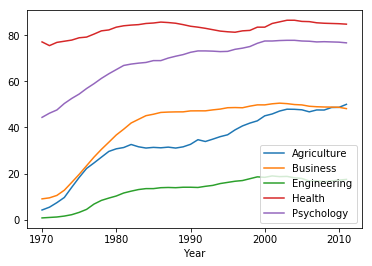

In [7]:
df.plot.line()

### Get rid of annoying text output with ; (semi-colon)

Some Python objects have a useful default output when the cell is executed. A Matplotlib plot has that text inside <> characters. The plot also shows up because we did the magic `%matplotlib inline`, but I get tired of the extra text output.

*It seems that the only way to get rid of that text is to follow your plot command by a semi-colon character `;`. Evidently that suppresses cell output, which here is that extra text.*

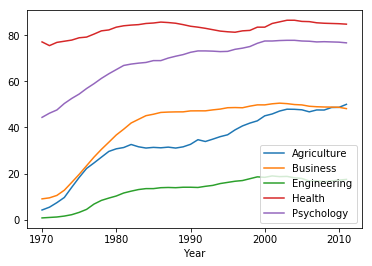

In [8]:
df.plot.line();

### Increase plot size

We can also set the figure size with an easy argument, `figsize=[,]`

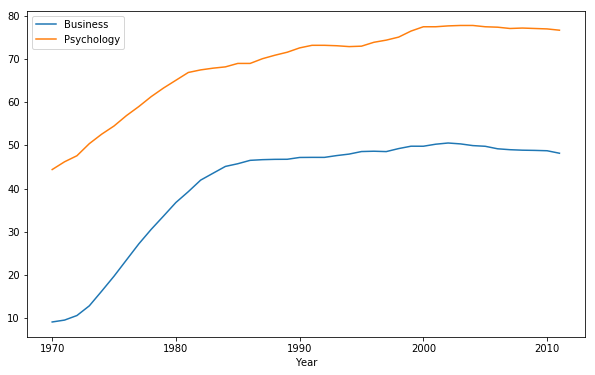

In [9]:
df.plot.line(y=['Business','Psychology'], figsize=[10,6]);

## Bar chart

Trying to do a bar chart of our whole time-series won't be illuminating, so let's calculate the mean values in each field over the data set.

In [10]:
df.mean()

Agriculture    33.848165
Business       40.653471
Engineering    12.892857
Health         82.983333
Psychology     68.776190
dtype: float64

### Vertical bar chart

**Then, notice, you can chain the plot commands right onto the end of the mean calculation!**

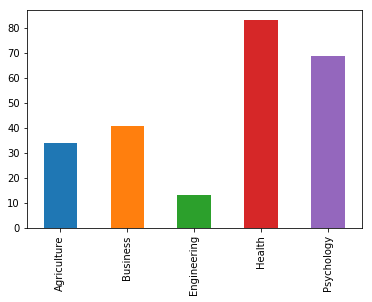

In [11]:
df.mean().plot.bar();

### Horizontal bar chart

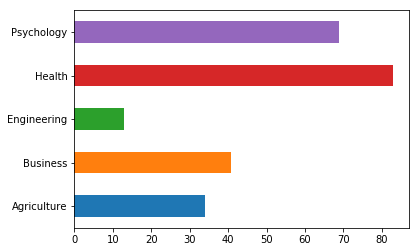

In [12]:
df.mean().plot.barh();

## Sorted bar charts

This visualization would more effectively show us the patterns in the data if the bars were sorted by length (descending). We can easliy do that with the `.sort_values()` method, which we can use for either a DataFrame or a Series. (Here, the mean over the columns is a Series.)

### Vertical bar charts go from left to right

For the vertical bars, the only complication is that ascending values is the default sort order, so we need to set `ascending=False` explicitly.

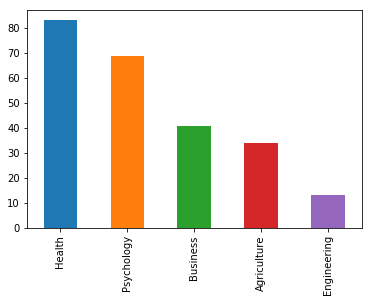

In [13]:
df.mean().sort_values(ascending=False).plot.bar();

### Horizontal bars go from bottom to top

But for the vertical bar chart, **like in Excel, the plot ordering goes from bottom to top, so we actually want an ascending sort!**

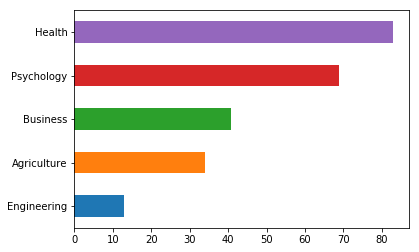

In [14]:
df.mean().sort_values().plot.barh();

## Histogram

Another useful way to explore your data is to look at the distribution of values in each column. Pandas can make easy histograms.

**Confusingly, there's a difference between calling `df.hist()` and `df.plot.hist()`!**

- `df.hist()` calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.
- `df.plot.hist()` groups the values of all given Series in the DataFrame into bins and draws all bins in one matplotlib.axes.Axes.

### `df.hist()`

The default is to have each set of axes independent, but that makes it harder to compare across the small multiples. Set `sharex=True` and `sharey=True` to make them the same. *I know this makes the default 10 bins for each column different widths, which is unfortunate, but see how your first impression is that the ranges are all similar when you don't make the same axes!*

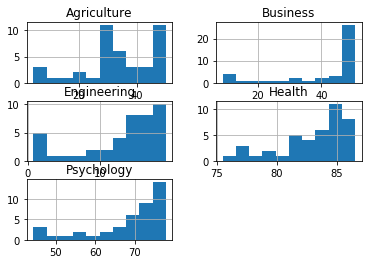

In [15]:
df.hist();

#### We can also change the layout of the small multiples

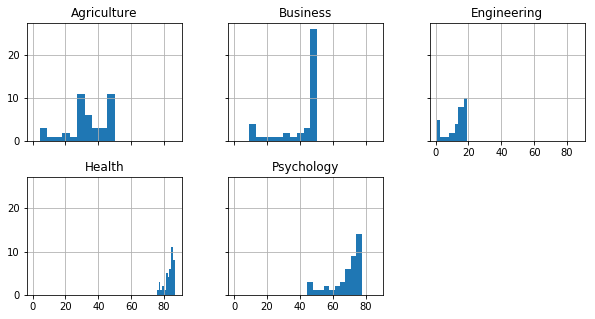

In [16]:
df.hist(sharex=True, sharey=True, layout=(2,3), figsize=(10,5));

### `df.plot.hist()`

This results in a single set of axes, with all histograms overlapped in different colors. With this data set there are too many categories overlapping for this to be very useful. **At least it put them automatically on common scales and uses the same bins.**

It helps to make the curves less opaque by setting the `alpha=` value. 1=opaque, 0=transparent.

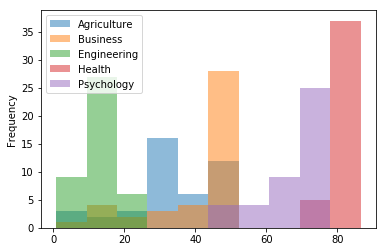

In [17]:
df.plot.hist(alpha=0.5);

## Box plot

A more compact summary of the comparisons of the distributions is a box plot.

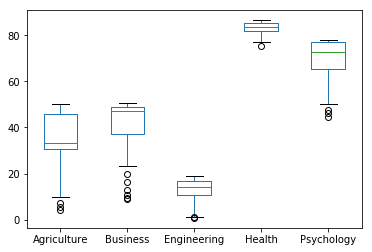

In [18]:
df.plot.box();

### Sorting box plot

To sort the box plot, it's slightly less straightforward than the bar chart, because the box plot needs to be computed and plotted with the original data – we just want to change the order in which the columns are plotted. 

To do this we'll sort the `.median()` Series, **and confusingly, we need to feed that into the `y=` argument, since in the Pandas plotting routines *Y is always the columns that are being used*, not the Y-axis of the resulting plot!!**

In [19]:
median_series = df.median()
median_series

Agriculture    33.317552
Business       47.210123
Engineering    14.100000
Health         83.700000
Psychology     72.750000
dtype: float64

In [20]:
median_series.sort_values(ascending=False, inplace=True)
median_series

Health         83.700000
Psychology     72.750000
Business       47.210123
Agriculture    33.317552
Engineering    14.100000
dtype: float64

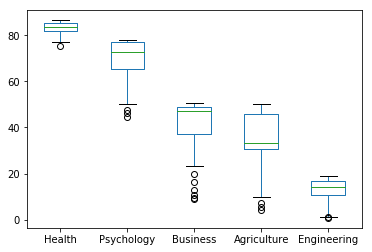

In [21]:
df.plot.box(y=median_series.index);

### Horizontal box plot

To make the boxplot horizontal, we need to feed in a `vert=False` argument. **This type of thing is why I don't tend to use the Pandas plotting routines – the syntax doesn't always make sense, and the arguments change based on the plot you're doing!**

*Take my Altair workshop to learn about a Python plotting module that is more consistent in its syntax, even if it isn't as convenient because it's not built into Pandas.*

Just like in the bar chart, for some reason left-to-right vertical boxplot translates into bottom-to-top in the horizontal version!

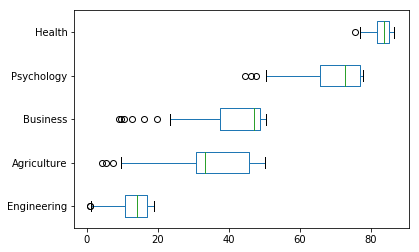

In [22]:
horiz_median = df.median().sort_values(ascending=True)
df.plot.box(y=horiz_median.index, vert=False);